# Unit 7 Assignment - Distinguishing Sentiments -CHU
Observable Trend 1: New York Times has the highest compound range based on tweets on 3/4
Observable Trend 2: Tweets mentioning New York Times skew negative, especially in comparison to BBC, CBS, CNN, and Fox News
Observable Trend 3: Tweets mentioning BBC News skews more positive, especially in comparison to CBS, CNN, Fox News, and NY Times

In [78]:
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from localenv import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns
import os
import csv
from localenv import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [79]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [80]:
target_terms = ("@BBCWorld", "@CBS", "@CNN", "@FoxNews", "@nytimes")
counter=1
sentiment=[]
for target in target_terms:
    oldest_tweet = None
    compound=[]
    pos=[]
    neg=[]
    neu=[]

    for x in range(2):
        public_tweets=api.search(target, count=100, result_type="recent", max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            results=analyzer.polarity_scores(tweet["text"])
            compound=results["compound"]
            pos=results["pos"]
            neu=results["neu"]
            neg=results["neg"]
              
            sentiment.append({"User":target,
               "Compound": compound,
               "Positive": pos,
               "Negative": neg,
               "Neutral": neu,
               "Tweet Count": counter})
            counter = counter + 1
    oldest_tweet=int(tweet['id_str'])-1

In [81]:
sentiments_pd=pd.DataFrame.from_dict(sentiment)
sentiments_pd.head()

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.4215,0.000,0.882,0.118,1,@BBCWorld
1,-0.1027,0.097,0.903,0.000,2,@BBCWorld
2,0.4215,0.000,0.882,0.118,3,@BBCWorld
3,0.0000,0.000,1.000,0.000,4,@BBCWorld
4,0.2714,0.353,0.141,0.506,5,@BBCWorld


In [82]:
sentiments_pd.to_csv("07TweetCSV_Chu.csv", index=False)

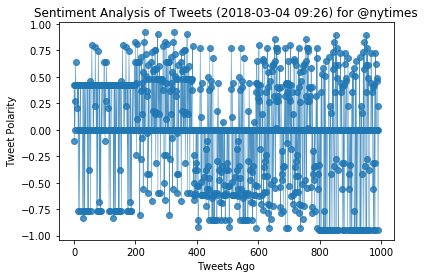

In [83]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),sentiments_pd["Compound"], marker="o", linewidth=0.5, alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

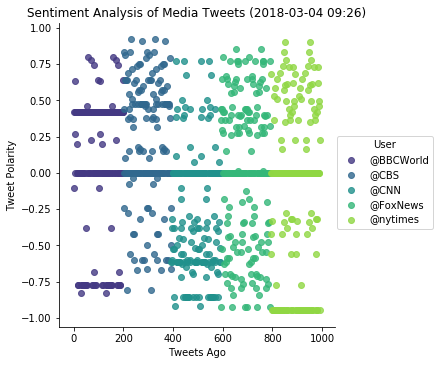

In [84]:
sns.lmplot(x="Tweet Count", 
           y="Compound",
           data=sentiments_pd,
           fit_reg=False, 
           palette="viridis",
           hue="User",
           legend=True)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Media Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("SentimentAnalysis1_Chu")

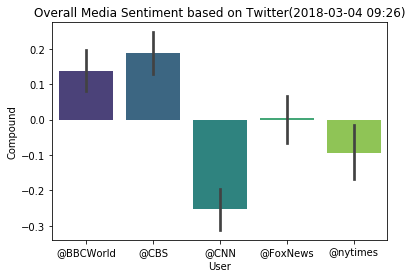

In [85]:
sns.barplot(x="User",
           y= "Compound",
           data = sentiments_pd,
            palette="viridis",
           order=None,
           hue_order="User")
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Overall Media Sentiment based on Twitter({})".format(now))
plt.savefig("SentimentAnalysis2_Chu")